# Estadistica Aplicada
## Ricardo de Jesús Cervantes García 1958971
## 31 de octubre

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import pmdarima as pm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

In [46]:
datos=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/datos_metrorrey.csv')

In [47]:
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['axes.labelsize']=12

In [48]:
datos.head(5)

,mes,miles de pasajeros,ingresos (miles de pesos)
0,1995/01,3439.0,3240.0
1,1995/02,2879.0,3623.0
2,1995/03,3103.0,3990.0
3,1995/04,3491.0,3321.0
4,1995/05,3109.0,3777.0


In [6]:
datos.dtypes

mes                           object
miles de pasajeros           float64
ingresos (miles de pesos)    float64
dtype: object

In [7]:
datos.isnull().sum()

mes                          0
miles de pasajeros           0
ingresos (miles de pesos)    0
dtype: int64

In [49]:
datos['mes']=pd.to_datetime(datos['mes'],format='%Y/%m')

In [50]:
datos=datos.set_index('mes')
datos=datos.asfreq('MS')

In [51]:
datos.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01'],
              dtype='datetime64[ns]', name='mes', length=344, freq='MS')

In [11]:
print(f'El numero de observaciones es',datos.shape[0])

El numero de observaciones es 344


In [12]:
print(f'El rango de fechas es {datos.index[0]} a {datos.index[-1]}')

El rango de fechas es 1995-01-01 00:00:00 a 2023-08-01 00:00:00


In [13]:
print(f'El valor minimo del numero de pasajeros es {datos["miles de pasajeros"].min()}, mientras que el numero maximo de pasajeros es {datos["miles de pasajeros"].max()} ')

El valor minimo del numero de pasajeros es 2397.0, mientras que el numero maximo de pasajeros es 17534.523 


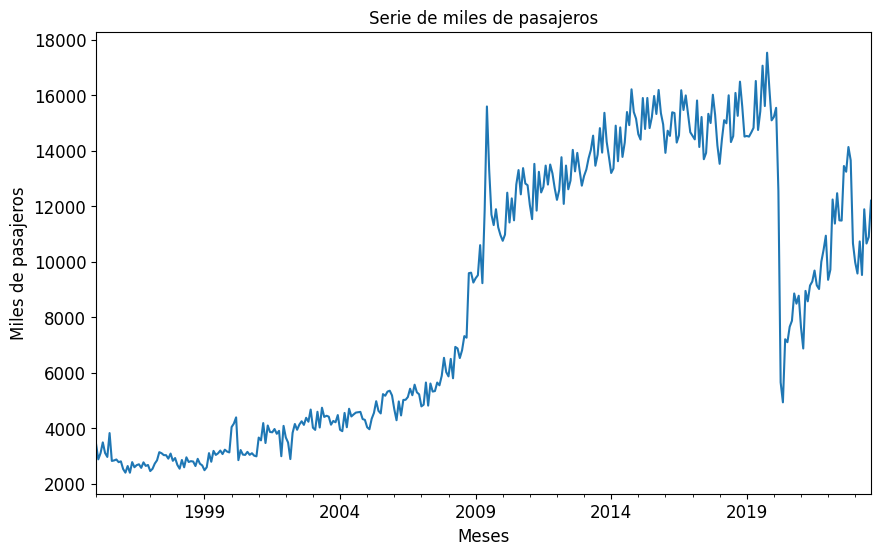

In [14]:
datos['miles de pasajeros'].plot()
plt.title('Serie de miles de pasajeros')
plt.xlabel('Meses')
plt.ylabel('Miles de pasajeros');

In [52]:
datos['PMS-7']=datos['miles de pasajeros'].rolling(7).mean()
datos.head(10)

,miles de pasajeros,ingresos (miles de pesos),PMS-7
mes,,,
1995-01-01,3439.0,3240.0,NaN
1995-02-01,2879.0,3623.0,NaN
1995-03-01,3103.0,3990.0,NaN
1995-04-01,3491.0,3321.0,NaN
1995-05-01,3109.0,3777.0,NaN
1995-06-01,2966.0,3614.0,NaN
1995-07-01,3826.0,3669.0,3259.000000
1995-08-01,2822.0,3666.0,3170.857143
1995-09-01,2840.0,3693.0,3165.285714


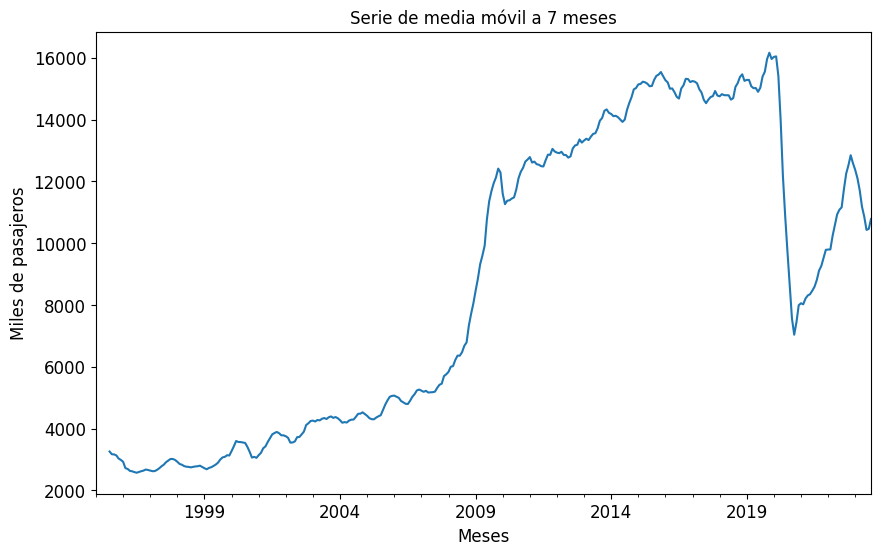

In [53]:
datos['PMS-7'].plot()
plt.title('Serie de media móvil a 7 meses')
plt.xlabel('Meses')
plt.ylabel('Miles de pasajeros');

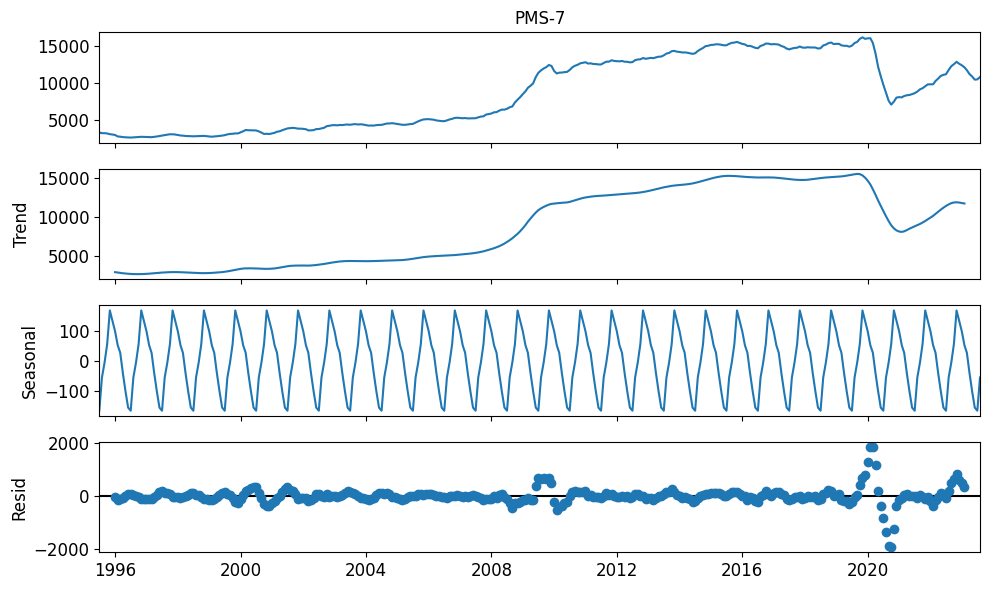

In [55]:
ets1 = seasonal_decompose(datos['PMS-7'].dropna(), model='add')
ets1.plot();

Podemos notar que en efecto hay un ciclo de subida y bajada cada año, esto se puede explicar ya que durante la temporada de vacaciones, el uso del transporte público disminuye considerablemente, mientras que en temporada de vueltas a clases el uso sube.

Existe una tendencia creciente ya que notamos en general con el paso del tiempo la cantidad de pasajeros ha ido aumentando históricamente.

In [17]:
from collections import Counter

In [18]:
model = sm.tsa.ExponentialSmoothing(datos['miles de pasajeros'], trend='add', seasonal='add', seasonal_periods=12)
result = model.fit()
predicciones = result.fittedvalues
estacional = datos['miles de pasajeros'] - predicciones
#meses_adecuados = estacional.idxmin()
percentil = 0.25
meses_adecuados = estacional[estacional < estacional.quantile(percentil)].index

c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [19]:
meses = [mes.month for mes in meses_adecuados]
frecuencia_meses = Counter(meses)
meses_comunes = frecuencia_meses.most_common(5)
print("Los meses más adecuados para el mantenimiento son:")
for mes, frecuencia in meses_comunes:
    print(f"{mes}: {frecuencia} veces")

Los meses más adecuados para el mantenimiento son:
1: 13 veces
4: 12 veces
12: 12 veces
6: 12 veces
2: 8 veces


Con lo anterior notamos que los meses mas adecuados para dar mantenimiento son Enero, Diciembre, Abril, Junio y Febrero

In [56]:
datos['SES']=datos['miles de pasajeros'].ewm(span=12,adjust=False).mean()
datos.head(5)

,miles de pasajeros,ingresos (miles de pesos),PMS-7,SES
mes,,,,
1995-01-01,3439.0,3240.0,NaN,3439.000000
1995-02-01,2879.0,3623.0,NaN,3352.846154
1995-03-01,3103.0,3990.0,NaN,3314.408284
1995-04-01,3491.0,3321.0,NaN,3341.576240
1995-05-01,3109.0,3777.0,NaN,3305.795280


In [57]:
datos['SED']=ExponentialSmoothing(datos['miles de pasajeros'],trend='add').fit().fittedvalues.shift(-1)

c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [58]:
datos['Holt-Winter']=ExponentialSmoothing(datos['miles de pasajeros'], trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues

c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [59]:
holtwinters=ExponentialSmoothing(datos['miles de pasajeros'],trend='add',seasonal='add',seasonal_periods=12).fit()

c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [62]:
pronostico_5meses=holtwinters.forecast(5)
pronostico_5meses

2023-09-01    11376.365802
2023-10-01    12100.389440
2023-11-01    11383.638273
2023-12-01    10864.113659
2024-01-01    10795.714684
Freq: MS, dtype: float64

In [63]:
ingresos_estimados=pronostico_5meses*7.1
ingresos_estimados

2023-09-01    80772.197193
2023-10-01    85912.765023
2023-11-01    80823.831741
2023-12-01    77135.206982
2024-01-01    76649.574259
Freq: MS, dtype: float64

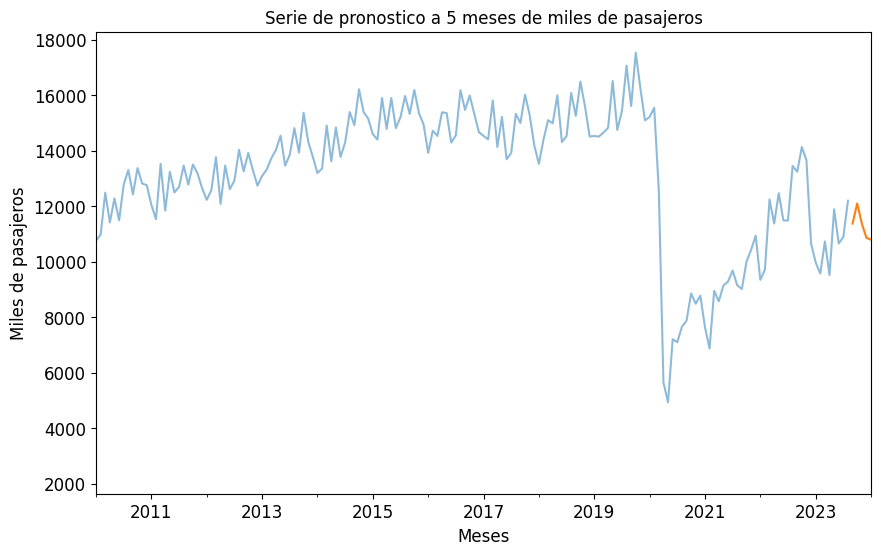

In [60]:
datos['miles de pasajeros'].plot(alpha=0.5)
pronostico_5meses.plot()
plt.title('Serie de pronostico a 5 meses de miles de pasajeros')
plt.xlabel('Meses')
plt.ylabel('Miles de pasajeros')
plt.xlim('2010-01-01', pronostico_5meses.index[-1]);

# Modelo ARIMA

In [64]:
prueba_adf=adfuller(datos['miles de pasajeros'])
pvalue=prueba_adf[1]
pvalue.round(2)

0.58

No rechazamos H0, por lo que significa que la serie de miles de pasajeros es no estacionaria, por lo que realizamos primeras diferencias.

In [65]:
datos['pasajeros_diff']=datos['miles de pasajeros'].diff()

In [66]:
prueba_adf1=adfuller(datos['pasajeros_diff'].dropna())
pvalue1=prueba_adf1[1]
pvalue1.round(2)

0.0

Rechazamos H0, por lo que significa que la serie de miles de pasajeros es estacionaria

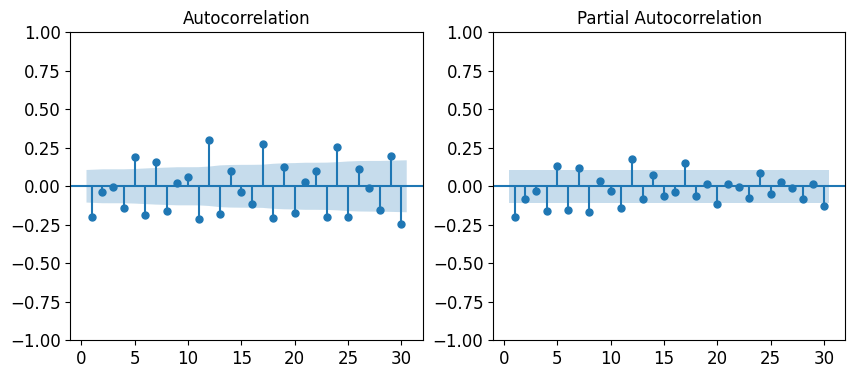

In [67]:
ig,ax=plt.subplots(1,2,figsize=(10,4))
plot_acf(datos['pasajeros_diff'].dropna(),zero=False,lags=30,ax=ax[0])
plot_pacf(datos['pasajeros_diff'].dropna(),zero=False,lags=30,ax=ax[1])
plt.show()

La grafica sugiere que tiene un componente estacional

In [31]:
arimaorder_aic=pm.auto_arima(datos['miles de pasajeros'],start_p=1,max_p=7,start_q=1, max_q=7,information_criterio='aic',seasonal=True,m=12,star_Q=1, max_P=7,start_P=1, max_Q=7)
arimaorder_aic.params

<bound method ARIMA.params of ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>

In [32]:
arimaorder_aic=pm.auto_arima(datos['miles de pasajeros'],start_p=1,max_p=7,start_q=1, max_q=7,information_criterio='bic',seasonal=True,m=12,star_Q=1, max_P=7,start_P=1, max_Q=7)
arimaorder_aic.params

<bound method ARIMA.params of ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>

In [33]:
arimaorder_aic=pm.auto_arima(datos['miles de pasajeros'],start_p=1,max_p=7,start_q=1, max_q=7,information_criterio='hqic',seasonal=True,m=12,star_Q=1, max_P=7,start_P=1, max_Q=7)
arimaorder_aic.params

<bound method ARIMA.params of ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>

In [34]:
arimaorder_aic=pm.auto_arima(datos['miles de pasajeros'],start_p=1,max_p=7,start_q=1, max_q=7,information_criterio='oob',seasonal=True,m=12,star_Q=1, max_P=7,start_P=1, max_Q=7)
arimaorder_aic.params

<bound method ARIMA.params of ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>

Seleccionamos bajo el criterio de AIC, por lo tanto es un ARIMA(1,1,3)(1,0,1,12)

In [68]:
model=ARIMA(datos['miles de pasajeros'],order=(1,1,3),seasonal_order=(1,0,1,12))
results=model.fit()
print(results.summary())

c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                 miles de pasajeros   No. Observations:                  344
Model:             ARIMA(1, 1, 3)x(1, 0, [1], 12)   Log Likelihood               -2772.716
Date:                            Sat, 04 Nov 2023   AIC                           5559.433
Time:                                    17:29:28   BIC                           5586.297
Sample:                                01-01-1995   HQIC                          5570.134
                                     - 08-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9508      0.037    -25.528      0.000      -1.024      -0.878
ma.L1          0.9126      0.050   

c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [69]:
datos.tail()

,miles de pasajeros,ingresos (miles de pesos),PMS-7,SES,SED,Holt-Winter,pasajeros_diff
mes,,,,,,,
2023-04-01,9523.669,38799.657,11181.227000,10982.408844,9713.595514,9626.533452,-1210.233
2023-05-01,11891.646,58511.798,10860.629429,11122.291484,11333.579366,10593.045294,2367.977
2023-06-01,10657.712,55684.063,10432.054000,11050.817717,10786.572846,11403.379310,-1233.934
2023-07-01,10894.497,56378.304,10464.836857,11026.768376,10834.696224,10991.173188,236.785
2023-08-01,12201.982,57821.901,10782.866714,11207.570472,NaN,11596.061581,1307.485


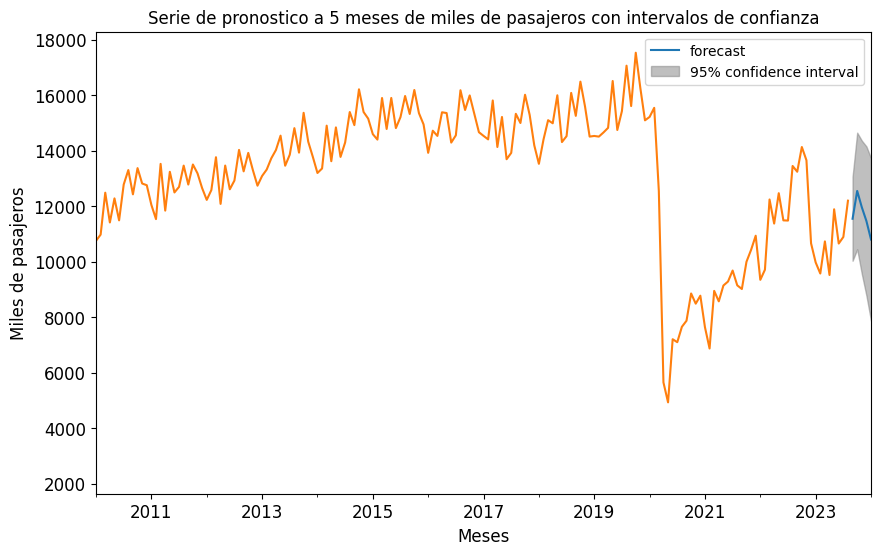

In [70]:
plot_predict(results,'2023-09-01','2024-01-01')
datos['miles de pasajeros'].plot()
plt.title('Serie de pronostico a 5 meses de miles de pasajeros con intervalos de confianza')
plt.xlabel('Meses')
plt.ylabel('Miles de pasajeros')
plt.xlim('2010-01-01', pronostico_5meses.index[-1]);

In [38]:
forecast=results.get_forecast(steps=5)
forecast_mean=forecast.predicted_mean
forecast_ci=forecast.conf_int()

In [39]:
inicio='2023-08-01'
fin='2024-01-01'

In [40]:
pronostico_valor=forecast_mean[inicio:fin]
pronostico_intervalos=forecast_ci.loc[inicio:fin]

In [41]:
df_pronostico=pd.DataFrame({'pronostico':pronostico_valor,
                            'limite inf':pronostico_intervalos.iloc[:,0],
                            'limite_sup':pronostico_intervalos.iloc[:,1]
})
df_pronostico

,pronostico,limite inf,limite_sup
2023-09-01,11550.767744,10036.862482,13064.673007
2023-10-01,12552.862921,10452.326416,14653.399426
2023-11-01,11966.538314,9565.883914,14367.192713
2023-12-01,11468.971711,8781.119154,14156.824267
2024-01-01,10801.939327,7872.642940,13731.235713


In [42]:
ingresos=df_pronostico*7.1
ingresos

,pronostico,limite inf,limite_sup
2023-09-01,82010.450985,71261.723622,92759.178348
2023-10-01,89125.326740,74211.517555,104039.135924
2023-11-01,84962.422026,67917.775790,102007.068263
2023-12-01,81429.699148,62345.945997,100513.452299
2024-01-01,76693.769219,55895.764872,97491.773565


In [43]:
print(f'pronosticamos que el numero de pasajeros va a estar en {df_pronostico.iloc[4,0].round(2)}\n y que con el 95% de confianza este estara entre {df_pronostico.iloc[4,1].round(2)} y {df_pronostico.iloc[4,2].round(2)}') 

pronosticamos que el numero de pasajeros va a estar en 10801.94
 y que con el 95% de confianza este estara entre 7872.64 y 13731.24


In [44]:
print(f'pronosticamos que los ingresos van a estar en {ingresos.iloc[4,0].round(2)}\n y que con el 95% de confianza este estara entre {ingresos.iloc[4,1].round(2)} y {ingresos.iloc[4,2].round(2)}') 

pronosticamos que los ingresos van a estar en 76693.77
 y que con el 95% de confianza este estara entre 55895.76 y 97491.77
